In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
sample = np.random.lognormal(mean=np.log(10_000),sigma=np.log(4.5),size=10000)

In [143]:
np.quantile(sample,.9)

70234.2426389729

In [144]:
above = sum(sample[sample>np.quantile(sample,.9)])

In [145]:
below = sum(sample[sample<np.quantile(sample,.9)])

In [146]:
above/total

0.4946915169874014

In [147]:
below/total

0.3614211609206644

In [169]:
mu = 0.6

In [245]:
alpha = params_uniform(.1)

In [246]:
max(alpha)

0.19999997416015677

In [247]:
np.mean(alpha)

0.10010405321444228

In [252]:
def params_uniform(mean,size=100000):
    if 2*mean>1:
        return np.random.uniform(size=size,low=2*mean-1,high=1)
    else:
        return np.random.uniform(size=size)*2*mean

In [253]:
alphas = params_uniform(.1)

In [254]:
thetas =  params_uniform(.8)

In [257]:
def generate_inflation_series(r0: float, kappa: float, simulation_timesteps: int, theta: float, mu:
float) -> np.array:
    r = np.zeros(simulation_timesteps)
    r[0] = r0
    for t in range(1, simulation_timesteps):
        r[t] = np.random.normal(
                loc=mu + (r[t - 1] - mu) * (np.exp(-kappa)),
                scale=((theta) / (2 * kappa)) * (1 - np.exp(-2 * kappa))
                )
    return r

In [310]:
N_sims = 100
N_simulation_timesteps = 1000
inflation_paths = np.zeros((N_simulation_timesteps,N_sims))
np.random.seed(2024)
for t in range(N_sims):

    inflation_paths[:,t] = generate_inflation_series(r0=0.02, kappa=.5,simulation_timesteps=N_simulation_timesteps,theta=.1,mu=.1)

In [311]:
top_90 = [np.quantile(inflation_paths[t,:],.9) for t in range(N_simulation_timesteps)]

In [312]:
top_10 = [np.quantile(inflation_paths[t,:],.1) for t in range(N_simulation_timesteps)]

median = [np.quantile(inflation_paths[t,:],.5) for t in range(N_simulation_timesteps)]

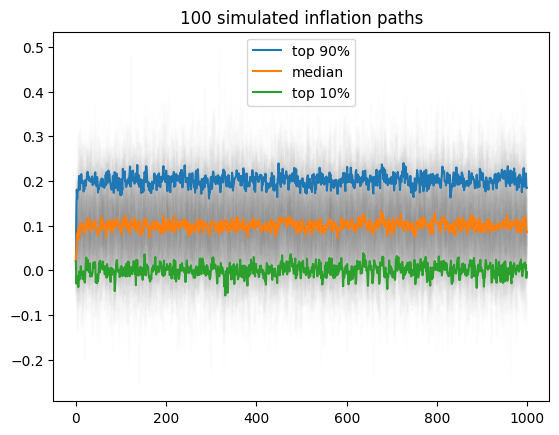

In [321]:
plt.plot(inflation_paths,color='grey',alpha=.01)
plt.plot(top_90, label='top 90%')
plt.plot(median, label='median')
plt.plot(top_10, label='top 10%')
plt.title('100 simulated inflation paths')
plt.legend()
plt.savefig('100_simulated_inflation_paths.pdf')

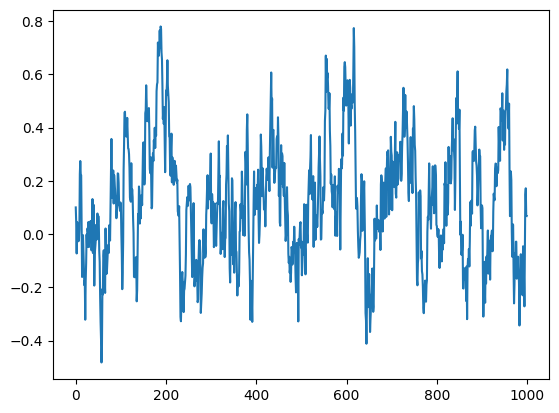

In [260]:
plt.plot(inflation_rates)